IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Proyecto de Investigación – Terremotos en Chile





## **Pregunta 4:**<br>
## **-Crear un promedio de tiempo en el que pueda predecir cada cuanto puede acontecer un terremoto**<br>

Veamos primero los rango de fechas y tipos de magnitudes

In [ ]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
from os import chdir, getcwd
if 'Preguntas'in getcwd():
    chdir('../')

In [2]:
df = pd.read_csv('data//query_limpio.csv',index_col=0)
df['date'] = pd.to_datetime(df['date'])
print(f"Primero sismo del df: {df['date'].min()}")
print(f"Último sismo del df: {df['date'].max()}")
total_años = (df['date'].max() - df['date'].min()).days/365.25
print(f"Años totales: {round(total_años, 4)} años")
print("\nAnalisis de datos de magnitud")
print(df['mag'].describe())
print("\nTipos de datos de magnitud")
print(df['magType'].value_counts())

Primero sismo del df: 1904-03-19 00:00:00
Último sismo del df: 2025-09-01 00:00:00
Años totales: 121.4538 años

Analisis de datos de magnitud
count    8977.000000
mean        4.929484
std         0.500316
min         4.500000
25%         4.600000
50%         4.800000
75%         5.100000
max         9.500000
Name: mag, dtype: float64

Tipos de datos de magnitud
magType
mb     5899
mwr     822
mww     635
mw      593
mwc     497
md      212
mwb     113
ml       91
ms       82
m        33
Name: count, dtype: int64


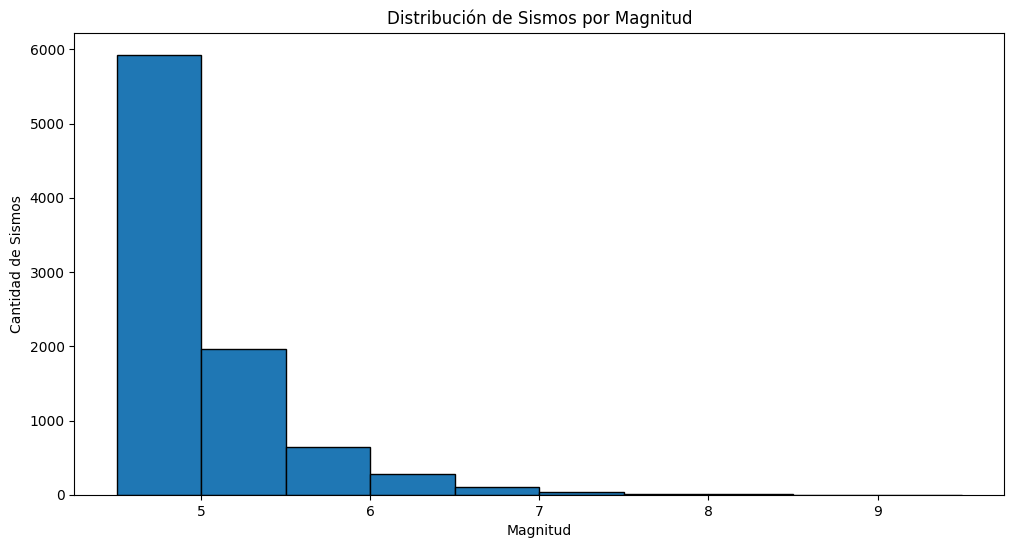

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(df['mag'], edgecolor='black')
plt.xlabel('Magnitud')
plt.ylabel('Cantidad de Sismos')
plt.title('Distribución de Sismos por Magnitud')
plt.show()

En el análisis de los 9,484 sismos en Chile, que abarcan desde el 19 de marzo de 1904 hasta el 1 de septiembre de 2025, corroboramos que los datos corresponden a magnitudes >= 4.5, con un máximo de 9.5. Esto podemos verificarlo, ya que el único sismo de 9.5 ocurrió en Chile. Sus percentiles se encuentran dentro del rango de 4.5 a 5.1, donde se ubica la mayoría de los sismos superiores a 4.5 y vemos que el grafico los datos estan bien relacionado ya que cada magnitud se disminuye mas del 50% en comparacion a su magnitud anterior pero a la vez hay una escesiva cantidad de sismo entre 4.5 a 5. En conclusión, los datos del dataframe en la columna de magnitud están correctos.

Al analizar los datos de magnitud, podemos observar que predominan dos tipos principales: "mb", con 6,170 casos, que es la escala más común para medir sismos entre magnitudes 4 y 6.5; y "Mw" y sus variantes, con 2,873 casos en total, que se utiliza para medir sismos en un rango de 0 a 9.5.

Para el análisis de la pregunta "Crear un promedio de tiempo en el que pueda predecir cada cuánto puede acontecer un terremoto", vamos a utilizar los sismos medidos con la escala "Mw", ya que esta abarca un rango mayor de magnitudes sin alteraciones y, además, es más rigurosa desde el punto de vista físico.

Dado que vamos a utilizar los sismos de magnitud Mw, eliminaremos todos los datos anteriores a 1975 para garantizar una mayor confiabilidad, ya que los registros de años anteriores eran menos confiable por lo cual mas properso a tener datos erroneos.

In [8]:
df_nuevo = df[df['date'] >= '1976-01-01']
magnitudes_mw = ['mww', 'mw', 'mwc', 'mwb', 'mwr']
df_mw = df_nuevo[df_nuevo['magType'].isin(magnitudes_mw)].reset_index(drop=True)
df_mw = df_mw[["latitude", "longitude", "mag", "magType", "date"]]
df_mw

,latitude,longitude,mag,magType,date
0,-26.8737,-71.1662,4.8,mwr,2025-08-11
1,-21.7681,-68.4846,4.7,mwr,2025-08-11
2,-29.2807,-71.8330,4.6,mwr,2025-07-27
3,-26.8262,-71.0132,4.7,mwr,2025-07-27
4,-22.1968,-68.6480,5.2,mww,2025-07-24
...,...,...,...,...,...
2294,-23.6810,-70.1290,6.1,mw,1983-10-16
2295,-26.1350,-70.5180,6.7,mw,1983-10-09
2296,-26.5350,-70.5630,7.4,mw,1983-10-04
2297,-40.9300,-74.9090,6.0,mw,1983-05-09


In [10]:
df_mw_clean = df_mw.dropna()
df_mw_clean = df_mw_clean.drop_duplicates(keep='first')
print("Cantidad total de nulos en df:", df_mw.isnull().sum().sum())
print("Cantidad total de duplicados en df:", df_mw.duplicated().sum())

Cantidad total de nulos en df: 0
Cantidad total de duplicados en df: 0


Eliminamos las columnas que no vamos a trabajar, a la vez comprobamos que no tenga datos nulos en magnitud.

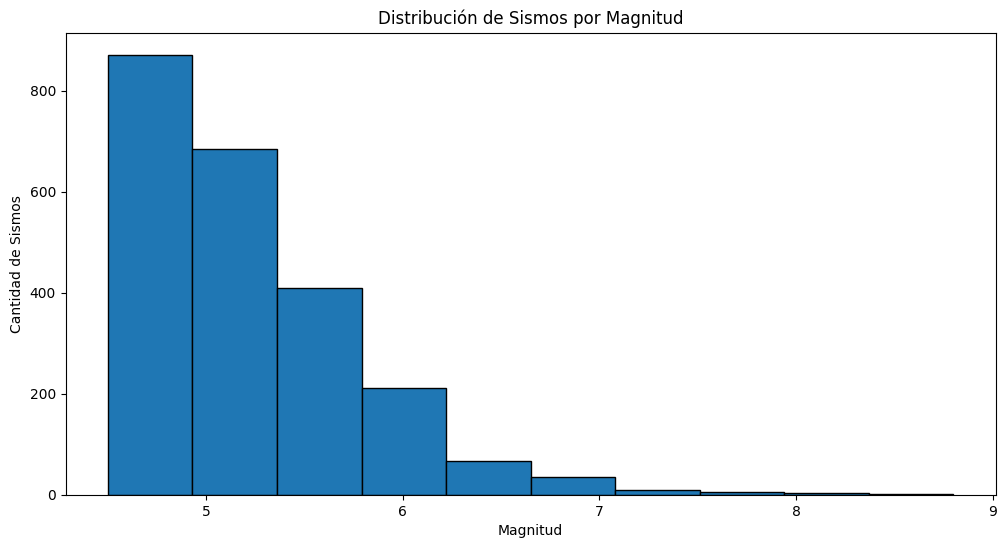

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(df_mw_clean['mag'], edgecolor='black')
plt.xlabel('Magnitud')
plt.ylabel('Cantidad de Sismos')
plt.title('Distribución de Sismos por Magnitud')
plt.show()